# TRAINING DATACAMP PART 1

## Images as data: visualizations
To display image data, you will rely on Python's Matplotlib library, and specifically use matplotlib's pyplot sub-module, that contains many plotting commands. Some of these commands allow you to display the content of images stored in arrays.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

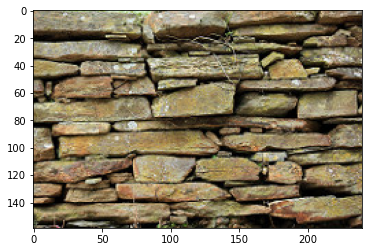

In [2]:
# Import matplotlib
import matplotlib.pyplot as plt

# Load the image
data = plt.imread('dataset/bricks.png')

# Display the image
plt.imshow(data)
plt.show()

## Images as data: changing images
To modify an image, you can modify the existing numbers in the array. In a color image, you can change the values in one of the color channels without affecting the other colors, by indexing on the last dimension of the array.

The image you imported in the previous exercise is available in data.

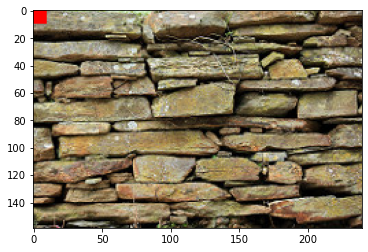

In [3]:
# Set the red channel in this part of the image to 1
data[:10,:10,0] = 1

# Set the green channel in this part of the image to 0
data[:10,:10,1] = 0

# Set the blue channel in this part of the image to 0
data[:10,:10,2] = 0

# Visualize the result
plt.imshow(data)
plt.show()

## Using one-hot encoding to represent images

Neural networks expect the labels of classes in a dataset to be organized in a one-hot encoded manner: each row in the array contains zeros in all columns, except the column corresponding to a unique label, which is set to 1.

The fashion dataset contains three categories:

1.Shirts

2.Dresses

3.Shoes

In this exercise, you will create a one-hot encoding of a small sample of these labels.

#### with the code below we are creating our own datasets and its one hot encoding like

[1,0,0] = shirt

[0,1,0] = dress

[0,0,1] = shoe

[0,1,0] = dress

[0,0,1] = shoe

[1,0,0] = shirt

[1,0,0] = shirt

[0,0,1] = shoe

[0,1,0] = dress

In [4]:
labels = np.array(['shoe', 'shirt', 'shoe', 'shirt', 'dress', 'dress', 'dress'])


# The number of image categories
n_categories = 3

# The unique values of categories in the data
categories = np.array(["shirt", "dress", "shoe"])

# Initialize ohe_labels as all zeros
ohe_labels = np.zeros((len(labels), n_categories))

# Loop over the labels
for ii in range(len(labels)):
    # Find the location of this label in the categories variable
    jj = np.where(categories==labels[ii])
    # Set the corresponding zero to one
    ohe_labels[ii,jj] = 1

In [5]:
print(ohe_labels)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


## Evaluating a classifier
o evaluate a classifier, we need to test it on images that were not used during training. This is called "cross-validation": a prediction of the class (e.g., t-shirt, dress or shoe) is made from each of the test images, and these predictions are compared with the true labels of these images.

The results of cross-validation are provided as one-hot encoded arrays: test_labels and predictions.

In [6]:
predictions = np.array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [7]:
test_labels = np.array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [8]:
# Calculate the number of correct predictions
number_correct = (predictions*test_labels).sum() 

# we multiply it because if we predict it true and multiply it for example [0,1,0]*[0,1,0] =[0,1,0]
#if we get wrong predictions [0,1,0]*[1,0,0] = [0,0,0] so we gut sum of 0
#and at the end if we use sum functions we will get 1 from here and at the end we will found exact number of true predictions

print(number_correct)

# Calculate the proportion of correct predictions
proportion_correct = number_correct/len(predictions)
print(proportion_correct)

6.0
0.75


## Build a neural network

We will use the Keras library to create neural networks and to train these neural networks to classify images. These models will all be of the Sequential type, meaning that the outputs of one layer are provided as inputs only to the next layer.

In this exercise, you will create a neural network with Dense layers, meaning that each unit in each layer is connected to all of the units in the previous layer. For example, each unit in the first layer is connected to all of the pixels in the input images. The Dense layer object receives as arguments the number of units in that layer, and the activation function for the units. For the first layer in the network, it also receives an input_shape keyword argument.

This course touches on a lot of concepts you may have forgotten, so if you ever need a quick refresher, download the Keras Cheat Sheet and keep it handy!

In [9]:
# Imports components from Keras
from keras.models import Sequential
from keras.layers import Dense

# Initializes a sequential model
model = Sequential()

# First layer
model.add(Dense(10, activation="relu", input_shape=(784,)))

# Second layer
model.add(Dense(10, activation="relu"))

# Output layer
model.add(Dense(3, activation="softmax"))


## Compile a neural network

Once you have constructed a model in Keras, the model needs to be compiled before you can fit it to data. This means that you need to specify the optimizer that will be used to fit the model and the loss function that will be used in optimization. Optionally, you can also specify a list of metrics that the model will keep track of. For example, if you want to know the classification accuracy, you will provide the list ['accuracy'] to the metrics keyword argument.

In [10]:
# Compile the model
model.compile(optimizer="adam", 
           loss="categorical_crossentropy", 
           metrics=['accuracy'])

## Fitting a neural network model to clothing data

In this exercise, you will fit the fully connected neural network that you constructed in the previous exercise to image data. The training data is provided as two variables: train_data that contains the pixel data for 50 images of the three clothing classes and train_labels, which contains one-hot encoded representations of the labels for each one of these 50 images. Transform the data into the network's expected input and then fit the model on training data and training labels.

The model you compiled in the previous exercise, and train_data and train_labels are available in your workspace.

In [11]:
#I have done this for fixing "Object arrays cannot be loaded when allow_pickle=False" error
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)


In [12]:
arr = np.load('fashion.npz')['arr_0']

In [13]:
test_data = arr.tolist()['test_data']
test_labels = arr.tolist()['test_labels']

train_data = arr.tolist()['train_data']
train_labels = arr.tolist()['train_labels']

In [14]:
# Reshape the data to two-dimensional array
train_data = train_data.reshape(50, 784)

# Fit the model
model.fit(train_data,train_labels,validation_split=0.2, epochs=3)

Epoch 1/3
2/2 [==============================] - 1s 183ms/step - loss: 1.1725 - accuracy: 0.4000 - val_loss: 1.1314 - val_accuracy: 0.5000
Epoch 2/3
2/2 [==============================] - 0s 28ms/step - loss: 1.0299 - accuracy: 0.6250 - val_loss: 1.0485 - val_accuracy: 0.8000
Epoch 3/3
2/2 [==============================] - 0s 33ms/step - loss: 0.9846 - accuracy: 0.8250 - val_loss: 1.0278 - val_accuracy: 0.9000


In [15]:
#measures overall success and shows accuracy

# Reshape test data
test_data = test_data.reshape(10, 784)

# Evaluate the model
model.evaluate(test_data, test_labels)

1/1 [==============================] - 0s 19ms/step - loss: 0.9224 - accuracy: 0.9000


[0.9224011301994324, 0.8999999761581421]

# TRAINING DATACAMP PART 2 
# Convolutions

## One dimensional convolutions

A convolution of an one-dimensional array with a kernel comprises of taking the kernel, sliding it along the array, multiplying it with the items in the array that overlap with the kernel in that location and summing this product.

In [16]:
array = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
kernel = np.array([1, -1, 0])
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Output array
for ii in range(8):
    conv[ii] = (kernel * array[ii:ii+3]).sum()

# Print conv
print(conv)

[ 1 -1  1 -1  1 -1  1 -1  0  0]


## Image convolutions
The convolution of an image with a kernel summarizes a part of the image as the sum of the multiplication of that part of the image with the kernel. In this exercise, you will write the code that executes a convolution of an image with a kernel using Numpy. Given a black and white image that is stored in the variable im, write the operations inside the loop that would execute the convolution with the provided kernel.

In [17]:
# I couldnt find which image is used but code is true
#kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
#result = np.zeros(im.shape)

# Output array
#for ii in range(im.shape[0] - 3):
#    for jj in range(im.shape[1] - 3):
#        result[ii, jj] = (im[ii:ii+3, jj:jj+3] * kernel).sum()

# Print result
#print(result)
#"""

## Defining image convolution kernels

In the previous exercise, you wrote code that performs a convolution given an image and a kernel. This code is now stored in a function called convolution() that takes two inputs: image and kernel and produces the convolved image. In this exercise, you will be asked to define the kernel that finds a particular feature in the image.

In [18]:
#For example, the following kernel finds a vertical line in images:
np.array([[-1, 1, -1], 
          [-1, 1, -1], 
          [-1, 1, -1]])

#a kernel that find horizontal lines in images
kernel = np.array([[-1, -1, -1], 
                   [1, 1, 1],
                   [-1, -1, -1]])


# in here     -1 = dark pixels       1 = light pixels

#a kernel that finds a light spot surrounded by dark pixels.
kernel = np.array([[-1, -1, -1], 
                   [-1, 1, -1],
                   [-1, -1, -1]])

#a kernel that finds a dark spot surrounded by bright pixels.
kernel = np.array([[1, 1, 1], 
                   [1, -1, 1],
                   [1, 1, 1]])


## Implementing image convolutions in Keras


## Convolutional network for image classification

Before training a neural network it needs to be compiled with the right cost function, using the right optimizer. During compilation, you can also define metrics that the network calculates and reports in every epoch. Model fitting requires a training data set, together with the training labels to the network.

The Conv2D model you built in the previous exercise is available in your workspace.

In [19]:
(img_cols, img_rows) = 28,28

In [20]:
# Import the necessary components from Keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

# Initialize the model object
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
               input_shape=(img_rows,img_cols,1)))

# Flatten the output of the convolutional layer
model.add(Flatten())
# Add an output layer for the 3 categories
model.add(Dense(3, activation='softmax'))

## Training a CNN to classify clothing types


In [21]:
test_data = arr.tolist()['test_data']
test_labels = arr.tolist()['test_labels']

train_data = arr.tolist()['train_data']
train_labels = arr.tolist()['train_labels']

In [22]:
train_data.shape

(50, 28, 28, 1)

In [23]:
# Compile the model 
model.compile(optimizer="adam", 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

# Fit the model on a training set
model.fit(train_data, train_labels, 
          validation_split=0.2, 
          epochs=3, batch_size=10)

Epoch 1/3
4/4 [==============================] - 0s 46ms/step - loss: 0.9955 - accuracy: 0.4500 - val_loss: 0.7110 - val_accuracy: 0.9000
Epoch 2/3
4/4 [==============================] - 0s 11ms/step - loss: 0.6751 - accuracy: 0.9750 - val_loss: 0.5424 - val_accuracy: 1.0000
Epoch 3/3
4/4 [==============================] - 0s 12ms/step - loss: 0.4756 - accuracy: 1.0000 - val_loss: 0.4353 - val_accuracy: 1.0000


## Evaluating a CNN with test data
To evaluate a trained neural network, you should provide a separate testing data set of labeled images. The model you fit in the previous exercise is available in your workspace.

In [24]:
# Evaluate the model on separate test data
model.evaluate(test_data,test_labels, batch_size=10) # (10 images per batch)

1/1 [==============================] - 0s 18ms/step - loss: 0.5092 - accuracy: 0.9000


[0.5092025399208069, 0.8999999761581421]

## Add padding to a CNN
Padding allows a convolutional layer to retain the resolution of the input into this layer. This is done by adding zeros around the edges of the input image, so that the convolution kernel can overlap with the pixels on the edge of the image.

In [25]:
# Initialize the model
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
                 input_shape=(img_rows, img_cols, 1), 
                 padding='same'))

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

## Add strides to a convolutional network
The size of the strides of the convolution kernel determines whether the kernel will skip over some of the pixels as it slides along the image. This affects the size of the output because when strides are larger than one, the kernel will be centered on only some of the pixels.

In [26]:
# Initialize the model
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
              input_shape=(img_rows, img_cols, 1), 
              strides=2))

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

# TRAINING DATACAMP PART 3 (GOING DEEPER)

## Creating a deep learning network
A deep convolutional neural network is a network that has more than one layer. Each layer in a deep network receives its input from the preceding layer, with the very first layer receiving its input from the images used as training or test data.

Here, you will create a network that has two convolutional layers.

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()

# Add a convolutional layer (15 units)
model.add(Conv2D(15, activation='relu', kernel_size=2, input_shape=(img_rows, img_cols, 1)))


# Add another convolutional layer (5 units)
model.add(Conv2D(5,activation="relu",kernel_size=2))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

## Train a deep CNN to classify clothing images

Training a deep learning model is very similar to training a single layer network. Once the model is constructed (as you have done in the previous exercise), the model needs to be compiled with the right set of parameters. Then, the model is fit by providing it with training data, as well as training labels. After training is done, the model can be evaluated on test data.

The model you built in the previous exercise is available in your workspace.

In [28]:
# Compile model
model.compile(optimizer="adam", 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model to training data 
model.fit(train_data, train_labels, 
          validation_split=0.2, 
          epochs=3, batch_size=10)

# Evaluate the model on test data
model.evaluate(test_data, test_labels, batch_size=10)

Epoch 1/3
4/4 [==============================] - 0s 47ms/step - loss: 0.9369 - accuracy: 0.7750 - val_loss: 0.7478 - val_accuracy: 0.9000
Epoch 2/3
4/4 [==============================] - 0s 14ms/step - loss: 0.6898 - accuracy: 0.9750 - val_loss: 0.5560 - val_accuracy: 1.0000
Epoch 3/3
1/1 [==============================] - 0s 19ms/step - loss: 0.4823 - accuracy: 0.9000


[0.4823124408721924, 0.8999999761581421]

## How many parameters in a deep CNN?
In this exercise, you will use Keras to calculate the total number of parameters along with the number of parameters in each layer of the network.

We have already provided code that builds a deep CNN for you.

In [29]:
# CNN model
model = Sequential()
model.add(Conv2D(10, kernel_size=2, activation='relu', 
                 input_shape=(28, 28, 1)))
model.add(Conv2D(10, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

# Summarize the model 
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 27, 27, 10)        50        
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 10)        410       
                                                                 
 flatten_4 (Flatten)         (None, 6760)              0         
                                                                 
 dense_7 (Dense)             (None, 3)                 20283     
                                                                 
Total params: 20,743
Trainable params: 20,743
Non-trainable params: 0
_________________________________________________________________


## Write your own pooling operation
As we have seen before, CNNs can have a lot of parameters. Pooling layers are often added between the convolutional layers of a neural network to summarize their outputs in a condensed manner, and reduce the number of parameters in the next layer in the network. This can help us if we want to train the network more rapidly, or if we don't have enough data to learn a very large number of parameters.

A pooling layer can be described as a particular kind of convolution. For every window in the input it finds the maximal pixel value and passes only this pixel through. In this exercise, you will write your own max pooling operation, based on the code that you previously used to write a two-dimensional convolution operation.

In [30]:
im = plt.imread('dataset/bricks.png')
# Result placeholder
result = np.zeros((im.shape[0]//2, im.shape[1]//2))

# Pooling operation
for ii in range(result.shape[0]):
    for jj in range(result.shape[1]):
        result[ii, jj] = np.max(im[ii*2:ii*2+2, jj*2:jj*2+2])

## Keras pooling layers
Keras implements a pooling operation as a layer that can be added to CNNs between other layers. In this exercise, you will construct a convolutional neural network similar to the one you have constructed before:

Convolution => Convolution => Flatten => Dense

However, you will also add a pooling layer. The architecture will add a single max-pooling layer between the convolutional layer and the dense layer with a pooling of 2x2:

Convolution => Max pooling => Convolution => Flatten => Dense

A Sequential model along with Dense, Conv2D, Flatten, and MaxPool2D objects are available in your workspace.

In [31]:
from keras.layers import MaxPool2D

model = Sequential()

# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Add a pooling operation
model.add(MaxPool2D(2))

# Add another convolutional layer
model.add(Conv2D(5,2,activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 27, 27, 15)        75        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 15)       0         
 )                                                               
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 5)         305       
                                                                 
 flatten_5 (Flatten)         (None, 720)               0         
                                                                 
 dense_8 (Dense)             (None, 3)                 2163      
                                                                 
Total params: 2,543
Trainable params: 2,543
Non-trainable params: 0
____________________________________________________

## Train a deep CNN with pooling to classify images
Training a CNN with pooling layers is very similar to training of the deep networks that y have seen before. Once the network is constructed (as you did in the previous exercise), the model needs to be appropriately compiled, and then training data needs to be provided, together with the other arguments that control the fitting procedure.

The following model from the previous exercise is available in your workspace:

Convolution => Max pooling => Convolution => Flatten => Dense

In [32]:
# Compile the model
model.compile(optimizer = "adam",loss="categorical_crossentropy", metrics=["accuracy"])

# Fit to training data
model.fit(train_data, train_labels, epochs=3, batch_size=10, validation_split=.2)

# Evaluate on test data 
model.evaluate(test_data, test_labels, batch_size=10)

Epoch 1/3
4/4 [==============================] - 0s 49ms/step - loss: 1.1405 - accuracy: 0.1250 - val_loss: 1.0791 - val_accuracy: 0.4000
Epoch 2/3
4/4 [==============================] - 0s 12ms/step - loss: 1.0682 - accuracy: 0.5000 - val_loss: 1.0190 - val_accuracy: 0.7000
Epoch 3/3
1/1 [==============================] - 0s 25ms/step - loss: 1.0291 - accuracy: 0.4000


[1.0290840864181519, 0.4000000059604645]

# TRAINING DATACAMP PART 4 (Tracking Learning)

## Plot the learning curves
During learning, the model will store the loss function evaluated in each epoch. Looking at the learning curves can tell us quite a bit about the learning process. In this exercise, you will plot the learning and validation loss curves for a model that you will train.

In [33]:
import matplotlib.pyplot as plt

model = Sequential()

# Add a convolutional layer
model.add(Conv2D(4, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Add a pooling operation
model.add(MaxPool2D(2))

# Add another convolutional layer
model.add(Conv2D(8,kernel_size=3,activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 27, 27, 4)         20        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 4)        0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 8)         296       
                                                                 
 flatten_6 (Flatten)         (None, 968)               0         
                                                                 
 dense_9 (Dense)             (None, 3)                 2907      
                                                                 
Total params: 3,223
Trainable params: 3,223
Non-trainable params: 0
____________________________________________________

In [34]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the training object
training = model.fit(train_data, train_labels, validation_split=.2, epochs=3, batch_size=10)

Epoch 1/3
4/4 [==============================] - 0s 47ms/step - loss: 1.1281 - accuracy: 0.2250 - val_loss: 1.0160 - val_accuracy: 0.5000
Epoch 2/3
4/4 [==============================] - 0s 12ms/step - loss: 1.0340 - accuracy: 0.4250 - val_loss: 0.9041 - val_accuracy: 1.0000
Epoch 3/3
4/4 [==============================] - 0s 11ms/step - loss: 0.9432 - accuracy: 0.6750 - val_loss: 0.8060 - val_accuracy: 1.0000


Epoch 1/3
4/4 [==============================] - 0s 18ms/step - loss: 0.8592 - accuracy: 0.7750 - val_loss: 0.7061 - val_accuracy: 0.9000
Epoch 2/3
4/4 [==============================] - 0s 11ms/step - loss: 0.7634 - accuracy: 0.8250 - val_loss: 0.6255 - val_accuracy: 1.0000
Epoch 3/3
4/4 [==============================] - 0s 11ms/step - loss: 0.6714 - accuracy: 0.8750 - val_loss: 0.5588 - val_accuracy: 1.0000


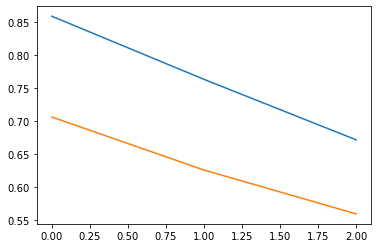

In [35]:
import matplotlib.pyplot as plt

# Train the model and store the training object
training = model.fit(train_data, train_labels, validation_split=0.2, epochs=3, batch_size=10)

# Extract the history from the training object
history = training.history

# Plot the training loss 
plt.plot(history['loss'])
# Plot the validation loss
plt.plot(history['val_loss'])

# Show the figure
plt.show()

## Adding dropout to your network
Dropout is a form of regularization that removes a different random subset of the units in a layer in each round of training. In this exercise, we will add dropout to the convolutional neural network that we have used in previous exercises:

1.Convolution (15 units, kernel size 2, 'relu' activation)

2.Dropout (20%)

3.Convolution (5 units, kernel size 2, 'relu' activation)

4.Flatten

5.Dense (3 units, 'softmax' activation)

A Sequential model along with Dense, Conv2D, Flatten, and Dropout objects are available in your workspace.

In [47]:
from keras.layers import Dropout

model = Sequential()

# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Add a dropout layer
model.add(Dropout(.2))

# Add another convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 27, 27, 15)        75        
                                                                 
 dropout_1 (Dropout)         (None, 27, 27, 15)        0         
                                                                 
 conv2d_27 (Conv2D)          (None, 26, 26, 5)         305       
                                                                 
 flatten_12 (Flatten)        (None, 3380)              0         
                                                                 
 dense_15 (Dense)            (None, 3)                 10143     
                                                                 
Total params: 10,523
Trainable params: 10,523
Non-trainable params: 0
_________________________________________________________________


## Add batch normalization to your network
Batch normalization is another form of regularization that rescales the outputs of a layer to make sure that they have mean 0 and standard deviation 1. In this exercise, we will add batch normalization to the convolutional neural network that we have used in previous exercises:

1.Convolution (15 units, kernel size 2, 'relu' activation)

2.Batch normalization

3.Convolution (5 unites, kernel size 2, 'relu' activation)

4.Flatten

5.Dense (3 units, 'softmax' activation)

A Sequential model along with Dense, Conv2D, Flatten, and Dropout objects are available in your workspace.

In [46]:
from keras.layers import BatchNormalization

model = Sequential()

# Add a convolutional layer
model.add(Conv2D(15,kernel_size=2,activation="relu",input_shape=(img_rows,img_cols,1)))


# Add batch normalization layer
model.add(BatchNormalization())

# Add another convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu'))

model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 27, 27, 15)        75        
                                                                 
 batch_normalization_3 (Batc  (None, 27, 27, 15)       60        
 hNormalization)                                                 
                                                                 
 conv2d_25 (Conv2D)          (None, 26, 26, 5)         305       
                                                                 
 flatten_11 (Flatten)        (None, 3380)              0         
                                                                 
 dense_14 (Dense)            (None, 3)                 10143     
                                                                 
Total params: 10,583
Trainable params: 10,553
Non-trainable params: 30
________________________________________________

## Extracting a kernel from a trained network
One way to interpret models is to examine the properties of the kernels in the convolutional layers. In this exercise, you will extract one of the kernels from a convolutional neural network with weights that you saved in a hdf5 file.

In [48]:
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Add another convolutional layer
model.add(Conv2D(15,kernel_size=2,activation='relu'))

# Add a pooling operation
model.add(MaxPool2D(2))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 27, 27, 5)         25        
                                                                 
 conv2d_29 (Conv2D)          (None, 26, 26, 15)        315       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 15)       0         
 2D)                                                             
                                                                 
 flatten_13 (Flatten)        (None, 2535)              0         
                                                                 
 dense_16 (Dense)            (None, 3)                 7608      
                                                                 
Total params: 7,948
Trainable params: 7,948
Non-trainable params: 0
___________________________________________________

In [ ]:
# Load the weights into the model
model.load_weights('weights.hdf5')

# Get the first convolutional layer from the model
c1 = model.layers[0]

# Get the weights of the first convolutional layer
weights1 = c1.get_weights()

# Pull out the first channel of the first kernel in the first layer
kernel = weights1[0][...,0, 0]
print(kernel)

## Shape of the weights
A Keras neural network stores its layers in a list called model.layers. For the convolutional layers, you can get the weights using the .get_weights() method. This returns a list, and the first item in this list is an array representing the weights of the convolutional kernels. If the shape of this array is (2, 2, 1, 5), what does the first number (2) represent?

Answer : The kernel size is 2 by 2.

That's correct, each of the 2s in this shape is one of the dimensions of the kernel.